In [15]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.pyplot import cm


In [16]:
# cities from UrClim excluding non-EU cities (i.e, Swiss cities)
all_cities = ['alicante', 'amsterdam', 'antwerp','athens', 'barcelona', 'bari', 'berlin',
            'bilbao', 'birmingham', 'bologna','bordeaux', 'brasov', 'bratislava','brussels', 'bucharest', 'budapest',
            'charleroi', 'cluj_napoca', 'cologne','copenhagen', 'debrecen','dublin', 'dusseldorf', 'edinburgh',
            'frankfurt_am_main', 'gdansk','genoa', 'ghent', 'glasgow','goteborg', 'graz', 'gyor',
            'hamburg', 'helsinki', 'klaipeda','kosice', 'krakow', 'leeds', 'leipzig','liege', 'lille', 'lisbon','ljubljana', 'lodz', 'london',
            'lyon', 'madrid','malaga', 'marseille', 'milan','miskolc', 'montpellier', 'munich','murcia', 'nantes', 'naples',
            'newcastle', 'nice',  'padua', 'palermo','palma_de_mallorca', 'paris', 'pecs',
            'porto', 'prague', 'riga', 'rome', 'rotterdam', 'sevilla',
            'sofia', 'split','stockholm', 'strasbourg', 'szeged','tallinn', 'tartu', 'thessaloniki',
            'toulouse', 'trieste','turin', 'utrecht', 'valencia','varna', 'vienna', 'vilnius',
            'warsaw', 'wroclaw', 'zagreb']

# exclude the cities that are not in Huang's mortality file
all_cities_mortality = all_cities.copy()
for city in ['alicante', 'birmingham', 'goteborg', 'lodz', 'newcastle', 'padua', 'palma_de_mallorca', 'tartu']:
    all_cities_mortality.remove(city)
# normal_cities: the cities with higher P_day than P_night        
normal_cities = []
normal_cities_long_lt, normal_cities_lat_lt = [], []
for city in all_cities_mortality:
    day_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\7\\{city}_day.txt')
    night_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\7\\{city}_night.txt')   
    if np.nansum(day_pop)>np.nansum(night_pop): ### 
        normal_cities.append(city)
        # use the coordinates of UrbClim to set location of the cities (DOI: 10.24381/cds.c6459d3a)
        file = nc.Dataset(f'C:\\Users\\glin\\Downloaded_data\\dataset-sis-urban-climate-cities\\tas_{city}_UrbClim_2015_07_v1.0.nc')
        long = np.mean([np.max(file["longitude"][:]), np.min(file["longitude"][:])])
        lat = np.mean([np.max(file["latitude"][:]), np.min(file["latitude"][:])])
        normal_cities_long_lt.append(long)
        normal_cities_lat_lt.append(lat)
        file.close()

# summer_cities: the cities with higher P_July_night than P_Jan_night; winter_cities: the opposites
summer_cities = []
winter_cities = []
summer_cities_long_lt, summer_cities_lat_lt = [], []
winter_cities_long_lt, winter_cities_lat_lt = [], []
for city in all_cities_mortality:
    July_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\7\\{city}_night.txt')
    Jan_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\1\\{city}_night.txt')   
    if (np.nansum(July_pop)>np.nansum(Jan_pop)): ### 
        summer_cities.append(city)
        # use the coordinates of UrbClim to set location of the cities 
        file = nc.Dataset(f'C:\\Users\\glin\\Downloaded_data\\dataset-sis-urban-climate-cities\\tas_{city}_UrbClim_2015_07_v1.0.nc')
        long = np.mean([np.max(file["longitude"][:]), np.min(file["longitude"][:])])
        lat = np.mean([np.max(file["latitude"][:]), np.min(file["latitude"][:])])
        summer_cities_long_lt.append(long)
        summer_cities_lat_lt.append(lat)
        file.close()
    else:
        winter_cities.append(city)
        file = nc.Dataset(f'C:\\Users\\glin\\Downloaded_data\\dataset-sis-urban-climate-cities\\tas_{city}_UrbClim_2015_07_v1.0.nc')
        long = np.mean([np.max(file["longitude"][:]), np.min(file["longitude"][:])])
        lat = np.mean([np.max(file["latitude"][:]), np.min(file["latitude"][:])])
        winter_cities_long_lt.append(long)
        winter_cities_lat_lt.append(lat)
        file.close()
        
    
day_pop_monthly = pd.read_excel('C:\\Users\\glin\\Downloaded_data\\Results\\all_monthly_population.xlsx', sheet_name='day', index_col=0)
night_pop_monthly = pd.read_excel('C:\\Users\\glin\\Downloaded_data\\Results\\all_monthly_population.xlsx', sheet_name='night', index_col=0)

C:\Users\glin\AppData\Local\Temp\ipykernel_43380\711761158.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels([int(t/1000) for t in tick_values])


Text(0.5, 1.0, '$\\rm \\Delta P_{daily, Jan}$ (n=66)')

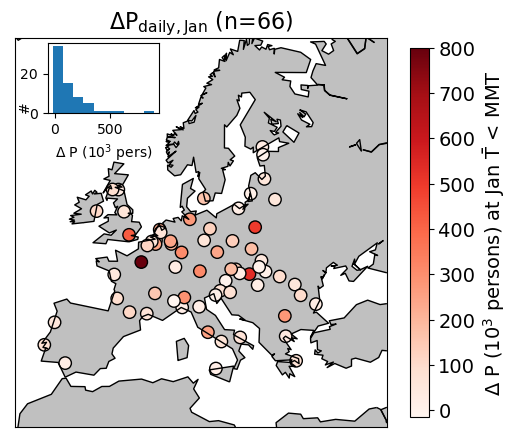

In [ ]:
# Figure 6. a,b,c can be produced by the code below. The MMT_file is from https://github.com/hkatty/Paper_UHI_mortality_Europe

diff_mean = pd.DataFrame(index=normal_cities, columns=['MMT'])

for city in diff_mean.index:
    # # summer daily or seasonal (change the second month 1 and both to nighttime!)
    # # day_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\\monthly_pop_array\\7\\{city}_day.txt') # chosse one month
    # # night_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\\monthly_pop_array\\7\\{city}_night.txt') # choose second month
    # # winter
    day_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\\monthly_pop_array\\1\\{city}_day.txt') # chosse one month
    night_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\\monthly_pop_array\\1\\{city}_night.txt') # choose second month
    MMT_file = pd.read_csv(f'C:\\Users\\glin\\Downloaded_data\\RRfit_zenodo\\MMT_urbclimT_{city.capitalize()}.csv', index_col=0)
    MMT = MMT_file['MMT'][2] # 45-65 year old
    thr_temp = MMT
    
    # ## summer
    # # temp= np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\July_meanT_2010to12\\{city}.txt')
    # # temp= np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\July_hottest3days_T_2010to12\\{city}.txt')
    # # diff_mean.loc[city,'MMT'] = int(np.nansum((day_pop-night_pop)[temp>thr_temp]))
    # # diff_mean.loc[city,'MMT'] = 100 * int(np.nansum((day_pop-night_pop)[temp>thr_temp])) / night_pop_monthly.loc[city, 7] # ratio
    
    # ## winter
    temp  = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\Jan_meanT_2010to12\\{city}.txt')
    diff_mean.loc[city,'MMT'] = int(np.nansum((day_pop-night_pop)[temp<thr_temp])) 
    # diff_mean.loc[city,'MMT'] = 100 * int(np.nansum((day_pop-night_pop)[temp<thr_temp])) / night_pop_monthly.loc[city, 1] # ratio


fig, ax = plt.subplots(figsize=(6, 6))
m = plt.subplot(111)

m = Basemap(projection='lcc',llcrnrlon=-10, llcrnrlat=30, urcrnrlon=60, urcrnrlat=65, resolution='c',lat_1=45.,lat_2=55,lat_0=45,lon_0=10)
m.fillcontinents(color='silver')
m.drawcoastlines()

# s=night_pop_monthly.loc[all_cities_mortality, 7]/20000
# plot Population > MMT
vmax = abs(diff_mean['MMT']).max()
vmin = - vmax
# scatter_plot = m.scatter(x=normal_cities_long_lt, y=normal_cities_lat_lt, latlon=True, c=diff_mean['MMT'], cmap='bwr', s=80, edgecolor='k', vmax=vmax, vmin=vmin)  # , vmax=40e3
scatter_plot = m.scatter(x=normal_cities_long_lt, y=normal_cities_lat_lt, latlon=True, c=diff_mean['MMT'], cmap='Reds', s=80, edgecolor='k', vmax=800e3)  # , vmax=800e3
cb = plt.colorbar(shrink=0.8) #  $\bar{\rm T}$
cb.ax.tick_params(labelsize=14) 

# add histogram in the inset
inset_ax = inset_axes(ax, width="30%", height="18%", bbox_to_anchor=(0.07, 0.79, 1, 1), bbox_transform=ax.transAxes, loc="lower left")
inset_ax.hist(diff_mean.MMT/1000, bins=10, color='tab:blue')
# inset_ax.hist(diff_mean.MMT, bins=10, color='tab:blue') # ratio
inset_ax.set_xlabel(r'$\Delta$ P ($\rm 10^3$ pers)')
# inset_ax.set_xlabel(r'$\Delta$ P (%)') # ratio
inset_ax.set_ylabel(r'#', labelpad=-8, loc='bottom')

## summer
# cb.set_label(label='$\Delta$ P'+r' ($\rm 10^3$ persons) at July ' + r'$\rm \bar{T}$ > MMT', size=14)
# cb.set_label(label='$\Delta$ P'+r' ($\rm 10^3$ persons) at July ' + r'$\rm T_{hottest}$ > MMT', size=14)
# cb.set_label(label='$\Delta$ P (%) at July ' + r'$\rm \bar{T}$ > MMT', size=14) # ratio
## winter
cb.set_label(label='$\Delta$ P'+r' ($\rm 10^3$ persons) at Jan ' + r'$\rm \bar{T}$ < MMT', size=14)
# cb.set_label(label='$\Delta$ P (%) at Jan ' + r'$\rm \bar{T}$ < MMT', size=14) # ratio
tick_values = cb.get_ticks()
cb.set_ticklabels([int(t/1000) for t in tick_values])

ax.set_title(r"$\rm \Delta P_{daily, Jan}$"+f' (n={len(diff_mean)})', fontsize=16) # winter daily
# ax.set_title(r"$\rm \Delta P_{daily, July}$"+f' (n={len(diff_mean)})', fontsize=16) # summer daily
# ax.set_title(r"$\rm \Delta P_{seasonal}$"+f' (n={len(diff_mean)})', fontsize=16) # seasonal 

# plt.legend(*scatter_plot.legend_elements("sizes", num=4, func = lambda s: 20000*s, color='white', markeredgecolor='black'), loc="upper left", title="Population ($10^6$)", framealpha=1, borderpad=0.8, labelspacing=1, handletextpad=0.2)
# plt.savefig('figures/seasonal_Julymean ratio')
# plt.savefig('figures/seasonal_Julymean')
# plt.savefig('figures/daily_Julymean ratio')
# plt.savefig('figures/daily_Julymean')
# plt.savefig('figures/daily_Julyhottest3days')
# plt.savefig('figures/daily_Janmean')
# plt.savefig('figures/daily_Janmean ratio')
# plt.savefig('figures/daily_July all cities')
# plt.savefig('figures/daily_Jan all cities')


In [ ]:
# Figure 6. d,e,f can be produced by the 2 code cells below

In [ ]:
# Look at the cumulative delta P (accumulating from the highest) up to a percentage, location corresponding to temperature
# positive delta P mostly within the top 20th quantile of the grid cells

cities_to_calculate = normal_cities 
# cities_to_calculate = summer_cities #for seasonal plot (Fg.6.f)

# DataFrame to store the data
df_stats = pd.DataFrame(index=cities_to_calculate, columns=['day_pop', 'diff_temp', 'diff_RR']) 

for i, city in enumerate(cities_to_calculate):
    ## summer
    day_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\7\\{city}_day.txt') ### seasonal change to night
    night_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\7\\{city}_night.txt') ### seasonal change to January    
    ## winter
    # day_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\1\\{city}_day.txt') 
    # night_pop = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\monthly_pop_array\\1\\{city}_night.txt')    
    delta_pop = day_pop - night_pop
    ## summer
    # temp = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\July_meanT_2010to12\\{city}.txt')
    # temp = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\July_hottest3days_T_2010to12\\{city}.txt')
    # temp = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\July_75th_T\\{city}.txt')
    
    ## winter
    temp = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\Jan_meanT_2010to12\\{city}.txt')
    # temp = np.loadtxt(f'C:\\Users\\glin\\Downloaded_data\\Results\\Jan_coldest3days_T_2010to12\\{city}.txt')
    
    MMT_file = pd.read_csv(f'C:\\Users\\glin\\Downloaded_data\\RRfit_zenodo\\MMT_urbclimT_{city.capitalize()}.csv', index_col=0)
    MMT_temp = MMT_file['MMT'][2] # 45-65 year old
    delta_temp = temp - np.nanmean(temp)
    norm_temp = (temp - np.nanmin(temp)) / (np.nanmax(temp)-np.nanmin(temp))
    
    # relative risk
    RRfit = pd.read_csv(f'C:\\Users\\glin\\Downloaded_data\\RRfit_zenodo\\RRfit_urbclimT_{city.capitalize()}_45-65.csv', index_col=0)
    RRfit.index.astype('float32')
    rounded_down_temp = np.round(temp.flatten(), decimals=1)
    # RR = [RRfit.allfit.iloc[np.argmin(abs(RRfit.index - t))] for t in rounded_down_temp]

    
    d = {'day_pop':day_pop.flatten(), 'night_pop':night_pop.flatten() ,'delta_pop': delta_pop.flatten(), 'temp':temp.flatten(), 'delta_temp': delta_temp.flatten(), 'norm_temp':norm_temp.flatten()} # , 'RR':RR, 'delta_RR':delta_RR
    df = pd.DataFrame(data=d)
    df = df.dropna(axis=0, how='any') # drop any row which contains at least one Nan
    df = df.drop(df[df.delta_pop < 0].index) # only considering the locations gain population
    
    # calculate RR of weighted temp or domain mean temp
    weighted_temp = (df.delta_pop * df.temp).sum() / df.delta_pop.sum() 
    RR_weighted_temp = RRfit.allfit.iloc[np.argmin(abs(RRfit.index - weighted_temp))]
    RR_mean_temp = RRfit.allfit.iloc[np.argmin(abs(RRfit.index  - np.nanmean(temp)))]
    
    df_stats.loc[city] = np.nansum(day_pop), weighted_temp-np.nanmean(temp), 100*(RR_weighted_temp-RR_mean_temp)/RR_mean_temp  # difference of population-weighted temperatures, not so big difference

Text(0, 0, '#')

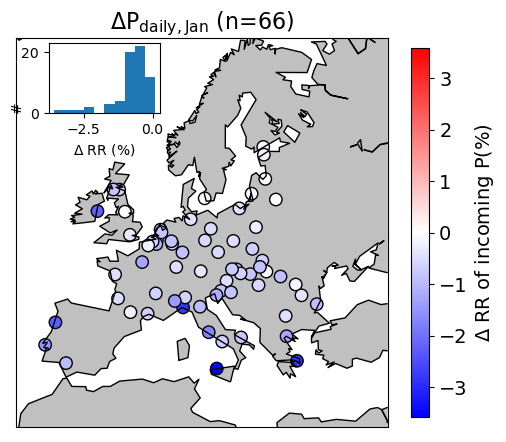

In [ ]:
# plot the change% of RR
fig, ax = plt.subplots(figsize=(6, 6))
m = plt.subplot(111)
m = Basemap(projection='lcc',llcrnrlon=-10, llcrnrlat=30, urcrnrlon=60, urcrnrlat=65, resolution='c',lat_1=45.,lat_2=55,lat_0=45,lon_0=10)
m.fillcontinents(color='silver')
m.drawcoastlines()
vmax = np.max((abs(df_stats.diff_RR)))
vmin = -vmax
scatter_plot = m.scatter(x=normal_cities_long_lt, y=normal_cities_lat_lt, latlon=True, c=df_stats.diff_RR, s=80, vmax=vmax, vmin=vmin, cmap='bwr', edgecolor='k') 
# scatter_plot = m.scatter(x=summer_cities_long_lt, y=summer_cities_lat_lt, latlon=True, c=df_stats.diff_RR, s=80, vmax=vmax, vmin=vmin, cmap='bwr', edgecolor='k') 


cb = plt.colorbar(shrink=0.8) 
cb.set_label(label=r'$\Delta$ RR of incoming P(%)', size=14)
cb.ax.tick_params(labelsize=14) 

# plt.title(r"$\rm \Delta P_{daily,July}$" + f' (n={len(df_stats)})', fontsize=16)
plt.title(r"$\rm \Delta P_{daily,Jan}$" + f' (n={len(df_stats)})', fontsize=16)
# plt.title(r"$\rm \Delta P_{seasonal}$" + f' (n={len(df_stats)})', fontsize=16)

inset_ax = inset_axes(ax, width="30%", height="18%", bbox_to_anchor=(0.07, 0.79, 1, 1), bbox_transform=ax.transAxes, loc="lower left")
inset_ax.hist(df_stats.diff_RR, bins=10, color='tab:blue')
inset_ax.set_xlabel(r'$\Delta$ RR (%)')
inset_ax.set_ylabel(r'#', labelpad=-2, loc='bottom')
